<img src="img_demo/theory_2.png" alt="Drawing" align="left" style="width: 700px;"/>

### Calculation of main dependencies described above

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import imageio
from PIL import Image, ImageOps
# import aux_funcs

# constants

c1 = 3.742e8
c2 = 1.439e4
c3 = 1.884e27

# functions 

def get_bb_spc_radiance (wvl, T):
    return c1 / ((wvl**5) * np.exp(c2/(wvl * T)) - 1)

def get_bb_photon_flux (wvl, T):
    return c3 / ((wvl**4) * np.exp(c2/(wvl * T)) - 1)

def get_temp_deriv (wvl, T):
    numerator = c1 * c2 * np.exp(c2 / (wvl * T))
    denominator = (wvl**6) * (T**2) * (np.exp(c2/(wvl * T)) - 1)**2
    return numerator / denominator

def get_flux_deriv (wvl, T):
    return c3 * c2 * np.exp(c2 / (wvl * T)) / ((wvl**5) * (T**2) * np.exp(c2/(wvl * T)) - 1)**2

def get_radiance_contrast (wvl_start, wvl_stop, T, n_samples = 1000):
    lambda_distr = np.linspace(wvl_start, wvl_stop, n_samples)
    delta_wvl = lambda_distr[1] - lambda_distr[0]
    P_distr = [get_temp_deriv(wvl, T) for wvl in lambda_distr]                  
    return delta_wvl * np.sum(P_distr) # radiance contrast in W/(m**2 * K)
          
wvl_range_um = np.linspace(1,22,1000)
T1 = 273
T2 = 283
T3 = 300

W1 = [get_bb_spc_radiance(i, T1) for i in wvl_range_um]
W2 = [get_bb_spc_radiance(i, T2) for i in wvl_range_um]
W3 = [get_bb_spc_radiance(i, T3) for i in wvl_range_um]

N1 = [get_bb_photon_flux(i, T1) for i in wvl_range_um]
N2 = [get_bb_photon_flux(i, T2) for i in wvl_range_um]
N3 = [get_bb_photon_flux(i, T3) for i in wvl_range_um]

dW1 = [get_temp_deriv(i, T1) for i in wvl_range_um]
dW2 = [get_temp_deriv(i, T2) for i in wvl_range_um]
dW3 = [get_temp_deriv(i, T3) for i in wvl_range_um]

dN1 = [get_flux_deriv(i, T1) for i in wvl_range_um]
dN2 = [get_flux_deriv(i, T2) for i in wvl_range_um]
dN3 = [get_flux_deriv(i, T3) for i in wvl_range_um]

fig, (axs) = plt.subplots(2, 2, figsize=(10, 8), sharey=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)

labels_size = 12

axs[0,0].plot(wvl_range_um, W1, label = 'T = 273 K')
axs[0,0].plot(wvl_range_um, W2, label = 'T = 283 K')
axs[0,0].plot(wvl_range_um, W3, label = 'T = 300 K')
axs[0,0].set_xlabel('Wavelength, um', fontsize = labels_size)
axs[0,0].set_ylabel('Spectral radiance, W m-2 u-1', fontsize = labels_size)
axs[0,0].set_title('Black body spectral radiance')
axs[0,0].legend()

axs[0,1].plot(wvl_range_um, N1, label = 'T = 273 K')
axs[0,1].plot(wvl_range_um, N2, label = 'T = 283 K')
axs[0,1].plot(wvl_range_um, N3, label = 'T = 300 K')
axs[0,1].set_xlabel('Wavelength, um', fontsize = labels_size)
axs[0,1].set_ylabel('Photon flux, photons s-1 m-2 u-1', fontsize = labels_size)
axs[0,1].set_title('Photon flux')
axs[0,1].legend()

axs[1,0].plot(wvl_range_um, dW1, label = 'T = 273 K')
axs[1,0].plot(wvl_range_um, dW2, label = 'T = 283 K')
axs[1,0].plot(wvl_range_um, dW3, label = 'T = 300 K')
axs[1,0].set_xlabel('Wavelength, um', fontsize = labels_size)
axs[1,0].set_ylabel('Temperature derivative, W m-2 um-1 K-1', fontsize = labels_size)
axs[1,0].set_title('Temperature derivative')
# axs[1,0].set_xlim([3,12])
# axs[1,0].set_ylim([0,300])
axs[1,0].legend()

axs[1,1].plot(wvl_range_um, dN1, label = 'T = 273 K')
axs[1,1].plot(wvl_range_um, dN2, label = 'T = 283 K')
axs[1,1].plot(wvl_range_um, dN3, label = 'T = 300 K')
axs[1,1].set_xlabel('Wavelength, um', fontsize = labels_size)
axs[1,1].set_ylabel('Flux derivative, photons s-1 m-2 um-1 K-1', fontsize = labels_size)
axs[1,1].set_title('Photon flux derivative')
# axs[1,1].set_xlim([8,12])
# axs[1,1].set_ylim([0,1.25e22])
axs[1,1].legend()

### Noise Voltage Calculation from  "Performance model for uncooled infrared bolometer arrays and performance predictions of bolometers operating at atmospheric pressure"

<img src="img_demo/3_x.png" alt="Drawing" align="left" style="width: 1000px;"/>

In [2]:
# Required parameters
k = 1.38e-23                          # Boltzmann constant

D_lens = 1.92e-3                      # input apeture size - metalens diameter
focal_length = 2e-3                   # focal distance
F = focal_length / D_lens             # F-number

K = 4e-30
v = 4e-16

G = 3.7e-8                           # total thermal conductance
TCR = 0.025                            # temperature coeffcienct of resistance
w = 30                                 # IR modulation frequency
C = 1e-10                             # thermal capacitance of a single pixel
fi = 20                               # imaging frame rate
fs = 1.66e-2                          # shutter frequency - uniformity correction frequency    
T1 = 300                              # detector temperature
xl = 32                               # amount of lines
xc = 32                               # amount of columns
tau_therm = C/G                       # thermal time constant of a bolometer pixel
fr = xl * fi                          # read-out integration frequency
fbol = 1 / (4 * tau_therm)            # bolometer thermal integration frequency
f_eff = np.min([fr, fbol])

Rbol = 1e5                            # pixel resistivity
Rroic = 1e5                           # input impedance of the ROIC

pixel_size = 12e-6                    # pixel side
A = pixel_size ** 2                   # pixel area
beta = 0.7                            # pixel fill-factor
phi = 0.8           # optics transmission
eps = 0.9             # infrared absroption rate of the bolometer membrane

lambda_start = 8
lambda_r = 12   

Vq = 2e-6
Vamp = 0.8e-6
Vadc = Vq/(12**0.5)
Reff = (Rbol*Rroic)/(Rbol + Rroic)
Iroic = 8e-11


### 1. 1/f Noise Voltage

<img src="img_demo/7_1f.png" alt="Drawing" align="left" style="width: 400px;"/>

<img src="img_demo/5_x.png" alt="Drawing" align="left" style="width: 1200px;"/>

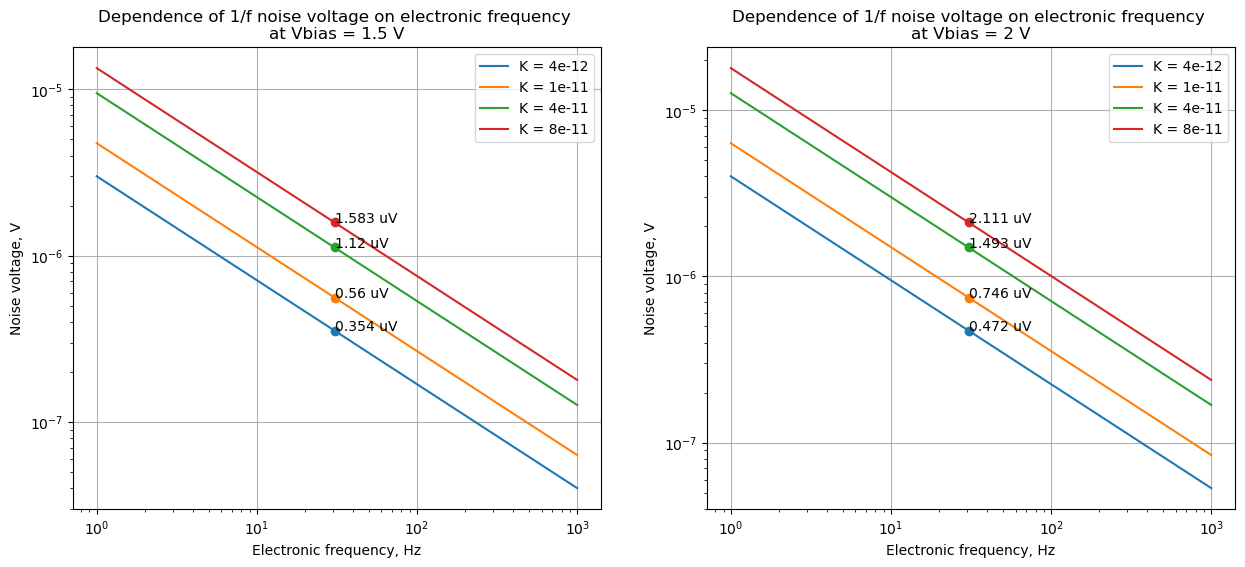

In [3]:
K_vals = 4e-12, 1e-11, 4e-11, 8e-11  # 1/f noise constant dimensionless
# "The Flicker Noise In Amorphous Silicon Based Temperature Sensors In Flexible Substrates"
# Moinuddin Ahmed, Donald P. Butler and Zeynep Celik-Butler
# 2011 21st International Conference on Noise and Fluctuations

Vbias = 1.5                        # SAIT DR
Rbol = 1e5                       # SAIT DR 
Ibias = Vbias / Rbol
gamma = 1.25
freq_req = 30
 
freq_list = [10**i for i in np.linspace(0,3,100)]
ind = [i for i in range(0, len(freq_list)) if freq_list[i] > freq_req][0]

fig, (axs) = plt.subplots(1, 2, figsize=(15, 6), sharey=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)
Vbias = 1.5
V_1f_list = [[] for i in range(len(K_vals))]
for i in range(4):
    V_1f_list[i] = [(K_vals[i] * Vbias**2 / (fr**gamma))**0.5 for fr in freq_list]
    axs[0].plot(freq_list, V_1f_list[i], label = 'K = ' + str(K_vals[i]))
    axs[0].scatter([freq_list[ind]],[V_1f_list[i][ind]])
    val = round(1e6 * V_1f_list[i][ind], 3)
    axs[0].text(freq_list[ind],V_1f_list[i][ind], str(val) + ' uV')
axs[0].set_xlabel('Electronic frequency, Hz')
axs[0].set_ylabel('Noise voltage, V')
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].legend()
axs[0].set_title(f'Dependence of 1/f noise voltage on electronic frequency \nat Vbias = {Vbias} V')
axs[0].grid()

Vbias = 2
for i in range(4):
    V_1f_list[i] = [(K_vals[i] * Vbias**2 / (fr**gamma))**0.5 for fr in freq_list]
    axs[1].plot(freq_list, V_1f_list[i], label = 'K = ' + str(K_vals[i]))
    axs[1].scatter([freq_list[ind]],[V_1f_list[i][ind]])
    val = round(1e6 * V_1f_list[i][ind], 3)
    axs[1].text(freq_list[ind],V_1f_list[i][ind], str(val) + ' uV')
axs[1].set_xlabel('Electronic frequency, Hz')
axs[1].set_ylabel('Noise voltage, V')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].legend()
axs[1].set_title(f'Dependence of 1/f noise voltage on electronic frequency \nat Vbias = {Vbias} V')
axs[1].grid()
V_1f = 0.5e-6

### According to experimental data an average value of < 0.5 uV of 1/f noise at 30 Hz frequency is considered an adequate estimation

### 2. Johnson Noise Voltage

<img src="img_demo/6_johnson.png" alt="Drawing" align="left" style="width: 400px;"/>

In [4]:
V_johnson = 2 * (k * T1 * Rbol * fr)**0.5 * (Rroic/(Rroic + Rbol))
print(f'Johnson noise voltage - {1e6 * V_johnson:.3f} uV')

Johnson noise voltage - 0.515 uV


### 3. ROIC Noise Voltage

In [5]:
Reff = Rbol * Rroic / (Rbol + Rroic)
V_roic = (Vamp**2 + Vadc**2 + Reff**2 * Iroic**2)**0.5

print(f'Vamp - {1e6 * Vamp:.3f} uV')
print(f'Vadc - {1e6 * Vamp:.3f} uV')
print(f'Reff * Iroic - {1e6 * Reff * Iroic:.3f} uV')
print(f'ROIC noise voltage - {1e6 * V_roic:.3f} uV ')

Vamp - 0.800 uV
Vadc - 0.800 uV
Reff * Iroic - 4.000 uV
ROIC noise voltage - 4.120 uV 


### 4. Thermal Noise Voltage + Responsivity

<img src="img_demo/8_temperature.png" alt="Drawing" align="left" style="width: 400px;"/>

In [6]:
R = (TCR * beta * eps * Reff * Ibias)/(G * (1 + w ** 2 * tau_therm**2)**0.5)    # bolometer responsivity
print(f'Bolometer responsivity R - {R} V/W')
V_thermal = (2 * k**0.5 * R * T1 * (G * f_eff)**0.5)/(beta * eps)
print(f'Thermal noise voltage - {1e6 * V_thermal:.3f} uV ')

Bolometer responsivity R - 318212.4832663408 V/W
Thermal noise voltage - 2.083 uV 


### 4. NETD Calculation via full noise voltage

In [7]:
Vn = (V_1f**2 + V_johnson**2 + V_thermal**2 + V_roic**2)**0.5            
dP_dT = get_radiance_contrast(lambda_start, lambda_r, T1)
NETD = (4 * F * Vn)/(R * A * phi * dP_dT)

print(f'V_1f - {1e6 * V_1f:.3f} uV')
print(f'V johnson - {1e6 * V_johnson:.3f} uV')
print(f'V thermal - {1e6 * V_thermal:.3f} uV')
print(f'V ROIC - {1e6 * V_roic:.3f} uV')
print(f'V full - {1e6 * Vn:.3f} uV')

print(f'NETD is {1e3 * NETD:.3f} mK')
y = [V_1f, V_johnson, V_thermal, V_roic]
mylabels = ["V 1/f", "V Johnson", "V thermal", "V ROIC"]
plt.pie(y, labels = mylabels)

V_1f - 0.500 uV
V johnson - 0.515 uV
V thermal - 2.083 uV
V ROIC - 4.120 uV
V full - 4.672 uV
NETD is 268.316 mK


([<matplotlib.patches.Wedge at 0x295957801c8>,
 [Text(1.0740504874490515, 0.23751957900445747, 'V 1/f'),
  Text(0.8694362075839965, 0.6738550889783039, 'V Johnson'),
  Text(-0.23918295579243234, 1.0736812905412834, 'V thermal'),
  Text(-0.2427455549479348, -1.072881445245941, 'V ROIC')])

### NETD calculation via separate components

<img src="img_demo/theory_12.png" alt="Drawing" align="left" style="width: 800px;"/>

In [8]:
# all necessary functions

def get_comm_mult(f_number, phi, dP_dT, G, beta, A, eps):
    return ((4 * f_number ** 2) / (phi * dP_dT)) * (G / (beta * A * eps)) # common multuplier calculated for all NETD components equally

def get_netd_1f(comm_mult, K, v, xl, fi, fs, w, C, G, TCR):
    return comm_mult * ((K/v) * (np.log(xl * fi /fs)) * (1 + w**2 * (C/G)**2))**0.5 / TCR

def get_netd_johnson(comm_mult, k, T1, Rbol, xl, fi, w, C, G, TCR, Vbias):
    return comm_mult * 2 * k**0.5 * ((T1 * Rbol * xl * fi * (1 + w**2 * (C/G)**2))**0.5)/(TCR * Vbias)

def get_netd_thermal(comm_mult, k, T1, C):
    return comm_mult * k**0.5 * T1 / (C**0.5)

def get_vroic(Rroic, Rbol, Iroic, Vamp, Vq):
    Veff = ((Rroic * Rbol) / (Rroic + Rbol)) * Iroic
    return (Vamp ** 2 + (Vq ** 2 / 12) + Veff**2) ** 0.5

def get_netd_roic(comm_mult, Rroic, Rbol, w, C, G, TCR, Vbias, Vroic):
    Coeff = comm_mult * (Rroic + Rbol) * (1 + w**2 * (C/G)**2)**0.5 / (TCR * Vbias * Rroic)
    return Coeff * Vroic

### 1. NETD separately

cm - 1118.0578142621714
Vroic - 4.1198705481281e-06
NETD 1/f - 14.581 mK
NETD johnson - 23.096 mK
NETD thermal - 124.602 mK
NETD ROIC - 184.855 mK
NETD full - 224.595 mK


([<matplotlib.patches.Wedge at 0x29596ecba08>,
 [Text(1.0904370885334596, 0.14473063238538134, 'NETD 1/f'),
  Text(0.9792596368202813, 0.5010494623234427, 'NETD Johnson'),
  Text(-0.26021095513555886, 1.0687797990360037, 'NETD thermal'),
  Text(-0.11217867630402702, -1.0942650248375283, 'NETD ROIC')])

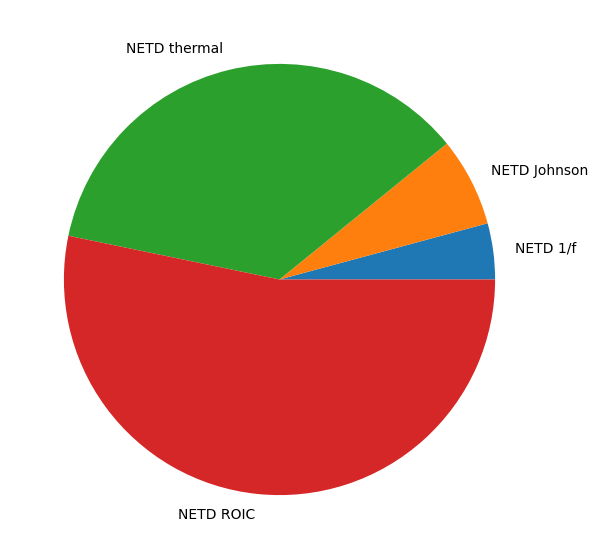

In [9]:
comm_mult = get_comm_mult(F, phi, dP_dT, G, beta, A, eps)
print(f'cm - {comm_mult}')

NETD_1_f = get_netd_1f(comm_mult, K, v, xl, fi, fs, w, C, G, TCR)
NETD_johnson = get_netd_johnson(comm_mult, k, T1, Rbol, xl, fi, w, C, G, TCR, Vbias)
NETD_thermal = get_netd_thermal(comm_mult, k, T1, C)  
Vroic = get_vroic(Rroic, Rbol, Iroic, Vamp, Vq)
print(f'Vroic - {Vroic}')
NETD_roic = get_netd_roic(comm_mult, Rroic, Rbol, w, C, G, TCR, Vbias, Vroic)
NETD_full = (NETD_1_f**2 + NETD_johnson**2 + NETD_thermal**2 + NETD_roic**2)**0.5

print(f'NETD 1/f - {1e3 * NETD_1_f:.3f} mK')
print(f'NETD johnson - {1e3 * NETD_johnson:.3f} mK')
print(f'NETD thermal - {1e3 * NETD_thermal:.3f} mK')
print(f'NETD ROIC - {1e3 * NETD_roic:.3f} mK')
print(f'NETD full - {1e3 * NETD_full:.3f} mK')

data = [NETD_1_f, NETD_johnson, NETD_thermal, NETD_roic]
mylabels = ["NETD 1/f", "NETD Johnson", "NETD thermal", "NETD ROIC"]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = mylabels)

### Effect of C/G on NETD

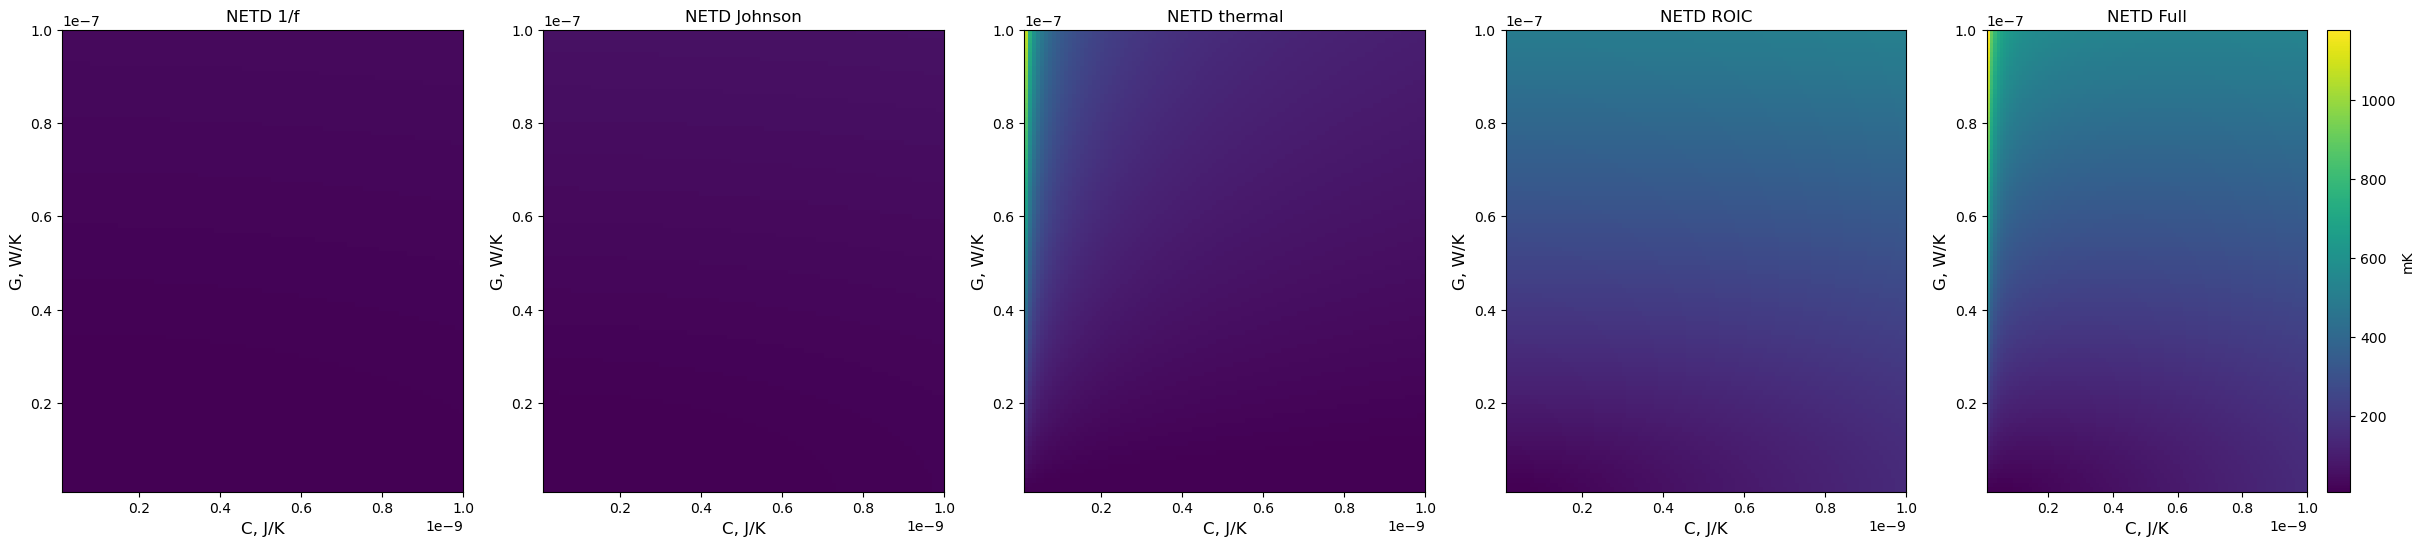

In [10]:
C_min = 1e-11
C_max = 1e-9

G_min = 1e-9
G_max = 1e-7

n_samples = 100
G_list = np.linspace(G_min, G_max, n_samples)
C_list = np.linspace(C_min, C_max, n_samples)

netd_1f_list = np.zeros([len(G_list), len(C_list)])
netd_johnson_list = np.zeros([len(G_list), len(C_list)])
netd_thermal_list = np.zeros([len(G_list), len(C_list)])
netd_roic_list = np.zeros([len(G_list), len(C_list)])
netd_full_list = np.zeros([len(G_list), len(C_list)])

count_C = 0
count_G = 0

for G in G_list:
    for C in C_list:
        comm_mult = get_comm_mult(F, phi, dP_dT, G, beta, A, eps)
        NETD_1_f = get_netd_1f(comm_mult, K, v, xl, fi, fs, w, C, G, TCR)
        NETD_johnson = get_netd_johnson(comm_mult, k, T1, Rbol, xl, fi, w, C, G, TCR, Vbias)
        NETD_thermal = get_netd_thermal(comm_mult, k, T1, C)  
        Vroic = get_vroic(Rroic, Rbol, Iroic, Vamp, Vq)
        NETD_roic = get_netd_roic(comm_mult, Rroic, Rbol, w, C, G, TCR, Vbias, Vroic)
        NETD_full = (NETD_1_f**2 + NETD_johnson**2 + NETD_thermal**2 + NETD_roic**2)**0.5
        
        netd_1f_list[count_G][count_C] = NETD_1_f
        netd_johnson_list[count_G][count_C] = NETD_johnson
        netd_thermal_list[count_G][count_C] = NETD_thermal
        netd_roic_list[count_G][count_C] = NETD_roic
        netd_full_list[count_G][count_C] = NETD_full
        
        count_C+=1
    count_G+=1
    count_C = 0
    
# PLOTTING RESULTS
    
fig, (axs) = plt.subplots(1, 5, figsize=(30, 6), sharey=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)

min_val = 1e3 * np.min(np.min(netd_full_list))
max_val = 1e3 * np.max(np.max(netd_full_list))

labels_size = 12

title_tuple = 'NETD 1/f','NETD Johnson','NETD thermal', 'NETD ROIC', 'NETD Full'
data_tuple = netd_1f_list, netd_johnson_list, netd_thermal_list, netd_roic_list, netd_full_list

for i in range(5):
    imr = axs[i].imshow(1e3 * np.flipud(data_tuple[i]), extent = [C_list[0] , C_list[-1], G_list[0] , G_list[-1]], aspect = 'auto', vmin = min_val, vmax = max_val)
    axs[i].set_xlabel('C, J/K', fontsize = labels_size)
    axs[i].set_ylabel('G, W/K', fontsize = labels_size)
    axs[i].set_title(title_tuple[i])
    # fig.colorbar(imr, ax = axs[i], label = 'mK')    
fig.colorbar(imr, ax = axs[4], label = 'mK') 

# ------------end -------------

[0.020729142677303938, 0.03283546908775234, 0.2628068238338268, 0.07571500931470965, 0.276239125895481]


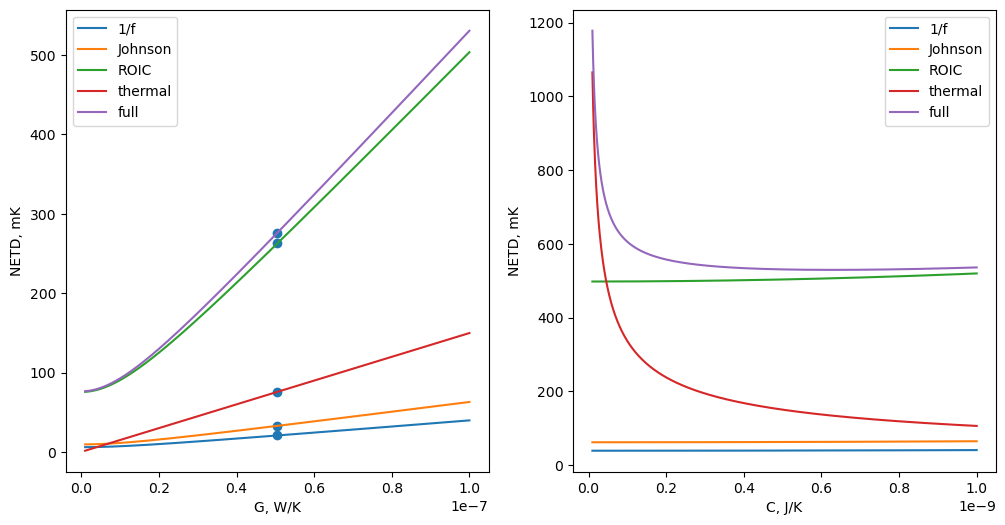

In [11]:
G_list = np.linspace(G_min, G_max, 1000)
C_list = np.linspace(C_min, C_max, 1000)

ind = int(0.5 * (len(G_list)))
C = C_list[ind]

fig, (axs) = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)

netd_1f_list = []
netd_johnson_list = []
netd_thermal_list = []
netd_roic_list = []
netd_full_list = []

for G in G_list:
    comm_mult = get_comm_mult(F, phi, dP_dT, G, beta, A, eps)
    NETD_1_f = get_netd_1f(comm_mult, K, v, xl, fi, fs, w, C, G, TCR)
    NETD_johnson = get_netd_johnson(comm_mult, k, T1, Rbol, xl, fi, w, C, G, TCR, Vbias)
    NETD_thermal = get_netd_thermal(comm_mult, k, T1, C)  
    Vroic = get_vroic(Rroic, Rbol, Iroic, Vamp, Vq)
    NETD_roic = get_netd_roic(comm_mult, Rroic, Rbol, w, C, G, TCR, Vbias, Vroic)
    NETD_full = (NETD_1_f**2 + NETD_johnson**2 + NETD_thermal**2 + NETD_roic**2)**0.5
    
    netd_1f_list.append(NETD_1_f)
    netd_johnson_list.append(NETD_johnson)
    netd_thermal_list.append(NETD_thermal)
    netd_roic_list.append(NETD_roic)
    netd_full_list.append(NETD_full)

axs[0].plot(G_list, 1e3 * np.asarray(netd_1f_list), label = '1/f')
axs[0].plot(G_list, 1e3 * np.asarray(netd_johnson_list), label = 'Johnson')
axs[0].plot(G_list, 1e3 * np.asarray(netd_roic_list), label = 'ROIC')
axs[0].plot(G_list, 1e3 * np.asarray(netd_thermal_list), label = 'thermal')
axs[0].plot(G_list, 1e3 * np.asarray(netd_full_list), label = 'full')
axs[0].set_xlabel('G, W/K')
axs[0].set_ylabel('NETD, mK')
axs[0].legend()

test_netd_vals = [netd_1f_list[ind], netd_johnson_list[ind], netd_roic_list[ind], netd_thermal_list[ind], netd_full_list[ind]]
test_G_vals = [G_list[ind] for i in range(len(test_netd_vals))]

axs[0].scatter(test_G_vals, 1e3 * np.asarray(test_netd_vals))

print(test_netd_vals)

netd_1f_list = []
netd_johnson_list = []
netd_thermal_list = []
netd_roic_list = []
netd_full_list = []

for C in C_list:
    comm_mult = get_comm_mult(F, phi, dP_dT, G, beta, A, eps)
    NETD_1_f = get_netd_1f(comm_mult, K, v, xl, fi, fs, w, C, G, TCR)
    NETD_johnson = get_netd_johnson(comm_mult, k, T1, Rbol, xl, fi, w, C, G, TCR, Vbias)
    NETD_thermal = get_netd_thermal(comm_mult, k, T1, C)  
    Vroic = get_vroic(Rroic, Rbol, Iroic, Vamp, Vq)
    NETD_roic = get_netd_roic(comm_mult, Rroic, Rbol, w, C, G, TCR, Vbias, Vroic)
    NETD_full = (NETD_1_f**2 + NETD_johnson**2 + NETD_thermal**2 + NETD_roic**2)**0.5
    
    netd_1f_list.append(NETD_1_f)
    netd_johnson_list.append(NETD_johnson)
    netd_thermal_list.append(NETD_thermal)
    netd_roic_list.append(NETD_roic)
    netd_full_list.append(NETD_full)

axs[1].plot(C_list, 1e3 * np.asarray(netd_1f_list), label = '1/f')
axs[1].plot(C_list, 1e3 * np.asarray(netd_johnson_list), label = 'Johnson')
axs[1].plot(C_list, 1e3 * np.asarray(netd_roic_list), label = 'ROIC')
axs[1].plot(C_list, 1e3 * np.asarray(netd_thermal_list), label = 'thermal')
axs[1].plot(C_list, 1e3 * np.asarray(netd_full_list), label = 'full')
axs[1].set_xlabel('C, J/K')
axs[1].set_ylabel('NETD, mK')
axs[1].legend()
